In [27]:
# Importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [28]:
# Importation du jeu de données 'tips'
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# <font color=red> Histogramme

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


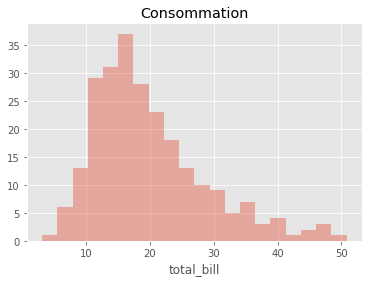

In [29]:
# Histogramme du montant total de la consommation
sns.distplot(df.total_bill, kde=False, bins=20).set_title('Consommation');

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


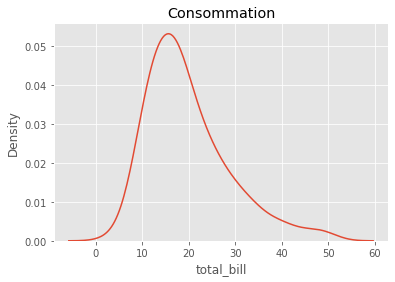

In [30]:
# Histogramme du montant total de la consommation
sns.distplot(df.total_bill, hist=False, bins=20).set_title('Consommation');


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


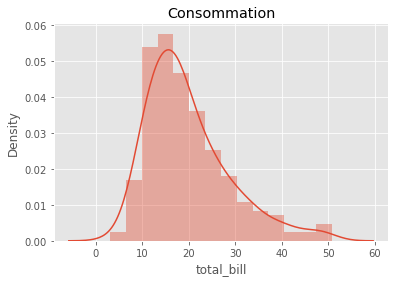

In [31]:
# Histogramme et Densité de probabilité du montant total de la consommation
sns.distplot(df.total_bill).set_title('Consommation');


In [77]:
df.total_bill.skew()

1.1332130376158205

In [78]:
df.total_bill.kurtosis()

1.2184840156638854

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


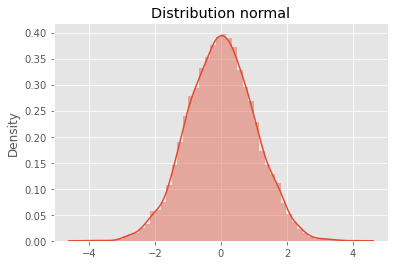

In [32]:
# Exemple de distribution normale
x = np.random.normal(size=10000)
sns.distplot(x, kde=True).set_title('Distribution normal');


In [46]:
# Importation du module stats de Scipy
from scipy import stats

# Fonction pour trouver les outliers
def outl(data_in , variable = 'tip'):
        # si data > iqr+1.5Q3: upp et si data<iqr-1.5Q1 :low
        upp = np.quantile(data_in[variable], 0.75) + 1.5*stats.iqr(data_in[variable])
        low = np.quantile(data_in[variable], 0.25)-stats.iqr(data_in[variable])
        data_out = data_in[(data_in[variable]<low)|(data_in[variable]>upp)]
        return data_out

In [50]:
# Points de données aberrants de la variable indiquant les pourboires

data = outl(df, variable ='tip')
data

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
183,23.17,6.50,Male,Yes,Sun,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3


In [52]:
data.index

Int64Index([23, 47, 59, 141, 170, 183, 212, 214, 239], dtype='int64')

# <font color=red> Boîte à moustache

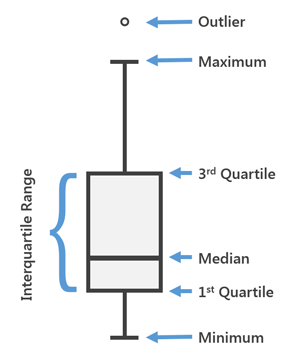

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


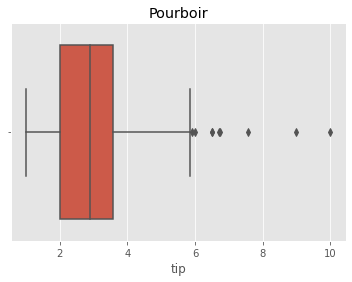

In [60]:
# Boîte à moustache du montant des pourboires

sns.boxplot(df.tip).set_title('Pourboir');

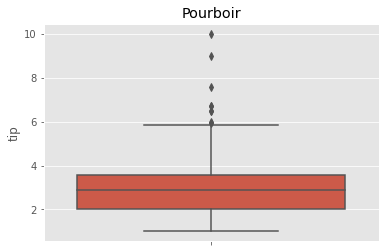

In [61]:
# Visualisation verticale de la boîte à moustache du montant des pourboires

sns.boxplot(y = df.tip).set_title('Pourboir');

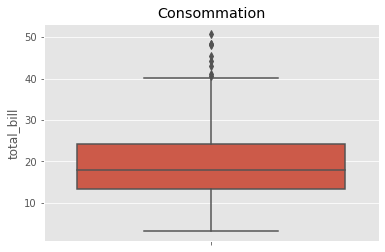

In [62]:
# Boîte à moustache du montant total de la consommation
sns.boxplot(y = df.total_bill).set_title('Consommation');


# <font color=red> Diagrammes à barres et circulaires

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


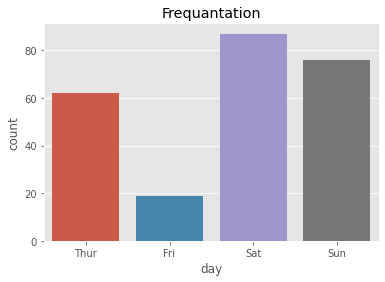

In [64]:
# Diagramme à barre de la variable 'day'  : modalité/effectif--diagramme à barre

sns.countplot(df.day).set_title('Frequantation');

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Frequantation')

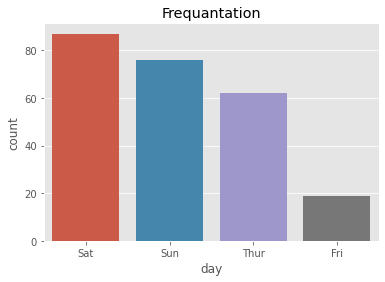

In [72]:
# Diagramme à barre de la variable 'day' (ordre décroissant)
sns.countplot(df.day, order=df.day.value_counts(ascending=False).index).set_title('Frequantation')
#plt.title('Frequantation')


"for p in ax.patches:\n    height=p.get_height()\n    ax.text(p.get_x()+p.get_width()/2.,height+3,\n           '{1.2f}'.format(height/total), ha='center')\nplt.show()"

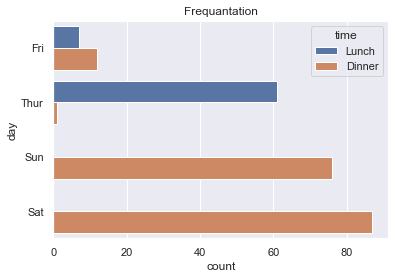

In [100]:
# Diagramme à barre de la variable 'day' (ordre croissant)
# Diagramme à barre de la variable 'day' (ordre décroissant)
import matplotlib.pyplot as plt
sns.set(style='darkgrid')
ax=sns.countplot(y=df.day, hue=df.time, order=df.day.value_counts(ascending=True).index).set_title('Frequantation')
#plt.title('Frequantation')
total =float(len(df))
'''for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+3,
           '{1.2f}'.format(height/total), ha='center')
plt.show()'''


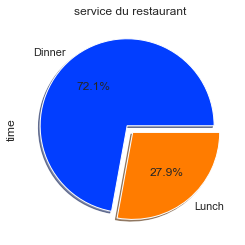

In [102]:
# Diagramme circulaire de la variable 'time'
df.time.value_counts().plot(kind='pie', title='service du restaurant', explode=[0.05]*2, colors= sns.color_palette('bright')[0:2], autopct='%1.1f%%', shadow=True, startangle=0);


Il est l'heure de pratiquer tout ce que vous avez vu dans cette secion sur l'analyse univariée. Veuillez donc réaliser les exercices se trouvant dans le fichier *2_Exercice.ipynb*.

BON TRAVAIL :)